## Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 5: Data Visualization 
#### Excercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipywidgets import interact, widgets

# Excercise 1
In this exercise, we will be using Universities_imputed_reduced.csv. Draw the following described visualizations.

    a.	Use boxplots to compare the student to faculty ratio (stud./fac. ratio) for the two population public and private universities.
    b.	Use a histogram to compare the student to faculty ratio (stud./fac. ratio) for the two population public and private universities.
    c.	use subplots to put the results of a and b on top of one another to create a visual that compares the two populations even better. 


In [2]:
uni_df = pd.read_csv('Universities_imputed_reduced.csv')
uni_df.head()

,College Name,State,Public/Private,num_appli_rec,num_appl_accepted,num_new_stud_enrolled,in-state tuition,out-of-state tuition,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,Private,193,146,55,7560,7560,76,11.9,15
1,University of Alaska at Fairbanks,AK,Public,1852,1427,928,1742,5226,67,10.0,60
2,University of Alaska Southeast,AK,Public,146,117,89,1742,5226,39,9.5,39
3,University of Alaska at Anchorage,AK,Public,2065,1598,1162,1742,5226,48,13.7,60
4,Alabama Agri. & Mech. Univ.,AL,Public,2817,1920,984,1700,3400,53,14.3,40


a. 

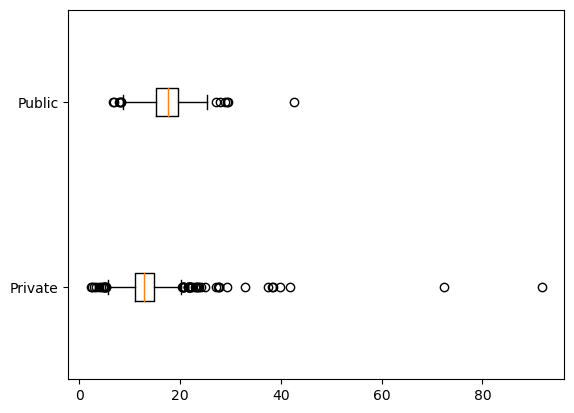

In [3]:
# with matplotlib
uni_types = uni_df.loc[:,'Public/Private'].unique()
uni_sr = pd.Series('', index=uni_types)
for t in uni_types:
    uni_sr[t] = uni_df.loc[uni_df['Public/Private'] == t, 'stud./fac. ratio']
plt.boxplot(uni_sr, vert=False)
plt.yticks([1,2],uni_types)
plt.show()

b. 

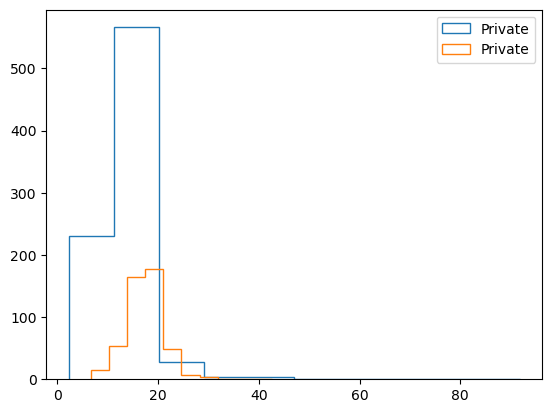

In [4]:
# with matplotlib
uni_types = uni_df.loc[:,'Public/Private'].unique()
for t in uni_types:
    plt.hist(uni_df.loc[uni_df['Public/Private'] == t, 'stud./fac. ratio'], label=uni_types, histtype='step')
plt.legend()
plt.show()

c. 

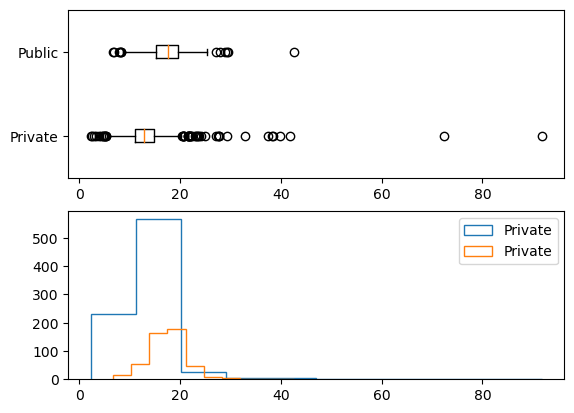

In [5]:
# the trick to combining them is the plt.subplot instruction.
uni_types = uni_df.loc[:,'Public/Private'].unique()
uni_sr = pd.Series('', index=uni_types)
for t in uni_types:
    uni_sr[t] = uni_df.loc[uni_df['Public/Private'] == t, 'stud./fac. ratio']
plt.subplot(2,1,1)
plt.boxplot(uni_sr, vert=False)
plt.yticks([1,2],uni_types)

uni_types = uni_df.loc[:,'Public/Private'].unique()
plt.subplot(2,1,2)
for t in uni_types:
    plt.hist(uni_df.loc[uni_df['Public/Private'] == t, 'stud./fac. ratio'], label=uni_types, histtype='step')
plt.legend()
plt.show()

# Excercise 2

In this exercise, we will continue using Universities_imputed_reduced.csv. Draw the following described visualizations.

    a.	Use a bar chart to compare the private/public ratio of all the states in the dataset. In this example, the populations we are comparing are the states. 
    b.	Improve the visualizations by sorting the states on the visuals based on the total number of universities they have.
    c.	Create a stacked bar chart that shows the compare the percentages of public and private schools across different states. 

a.

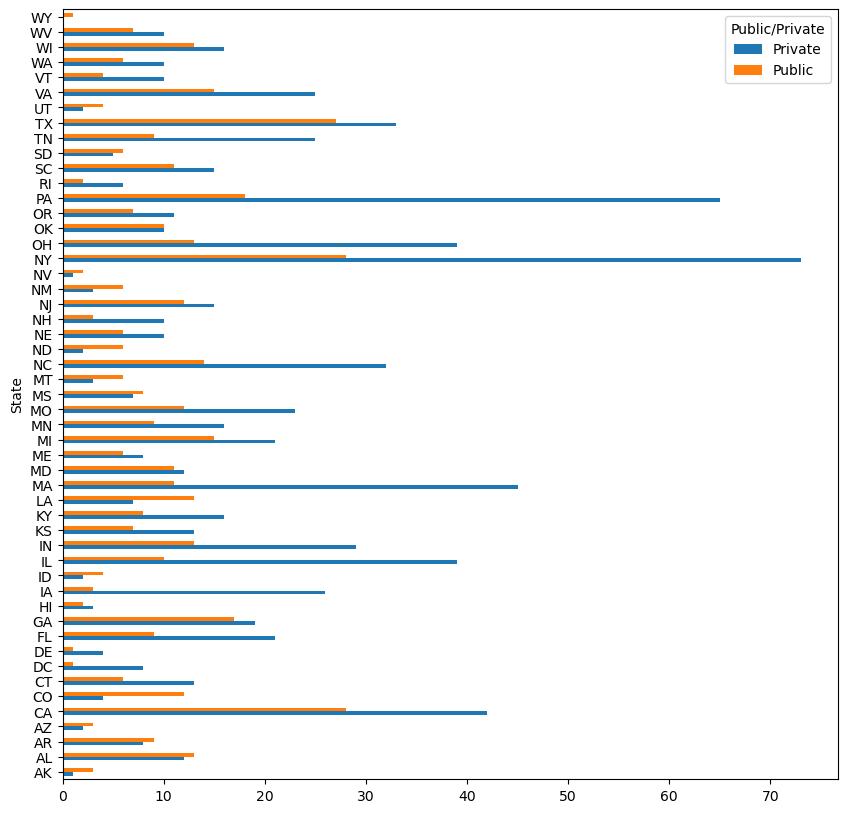

In [6]:
# this is one way to make the image bigger with fig size, don't forget the ax=ax in the barh!
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
uni_df.groupby(['State', 'Public/Private']).size().unstack().plot.barh(ax=ax)
plt.show()

b.

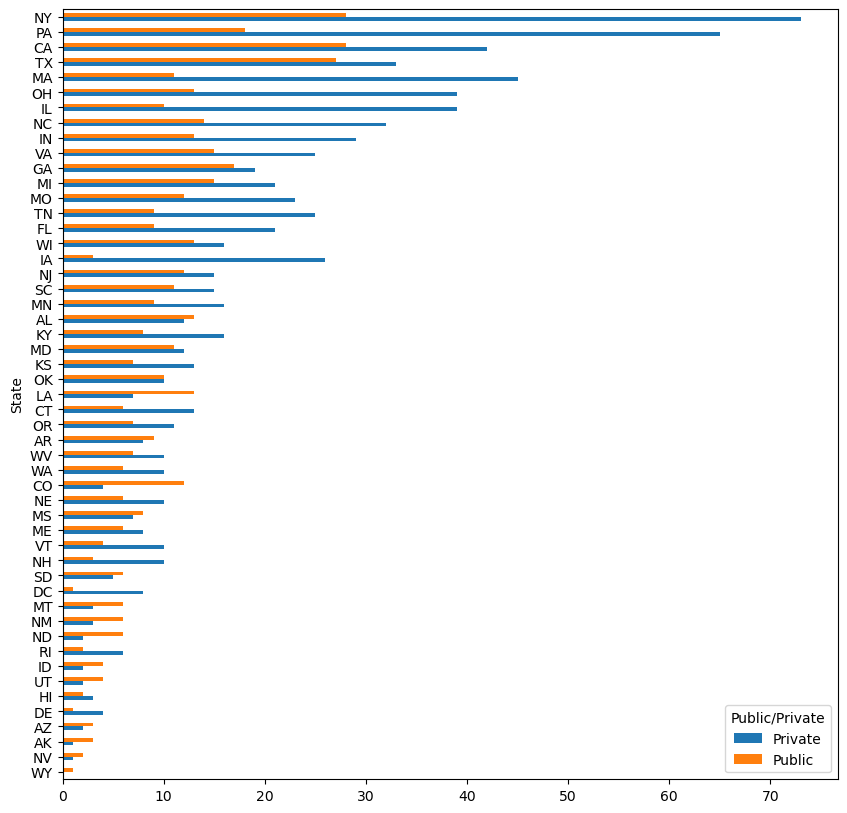

In [7]:
sort_order = uni_df.groupby(['State']).size().sort_values(ascending=True).index.to_list()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

uni_df.groupby(['State', 'Public/Private']).size().unstack().reindex(sort_order).plot.barh(ax=ax)

plt.show()



c.

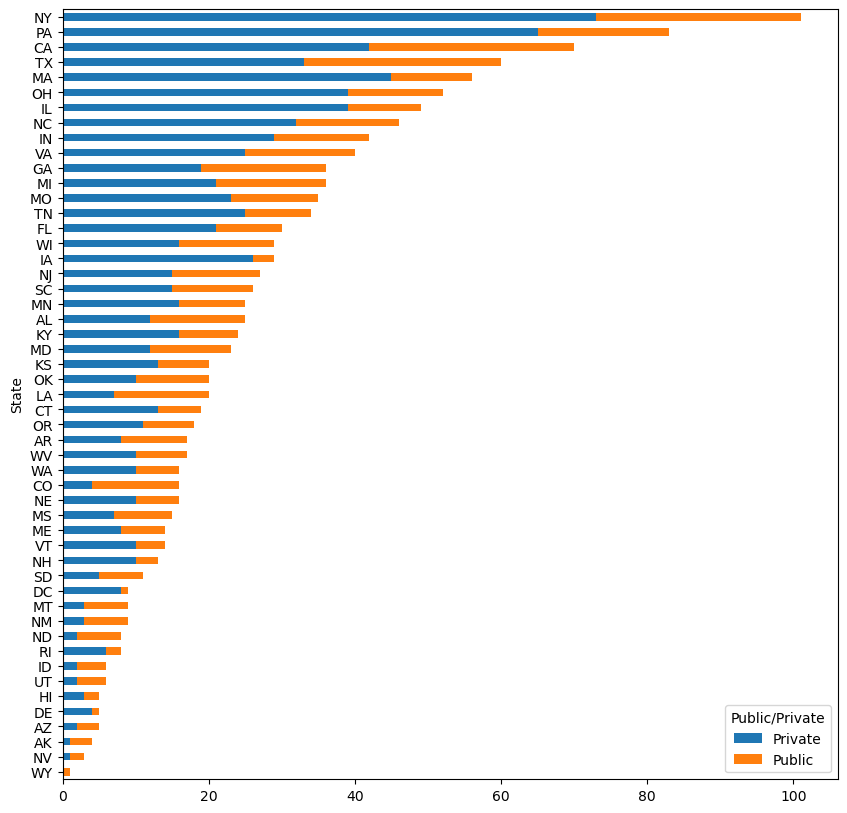

In [8]:
sort_order = uni_df.groupby(['State']).size().sort_values(ascending=True).index.to_list()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

uni_df.groupby(['State', 'Public/Private']).size().unstack().reindex(sort_order).plot.barh(ax=ax, stacked=True)

plt.show()


# Excercise 3

For this example, we will be using WH Report_preprocessed.csv. Draw the following described visualizations.

    a.	Create a visual that compares the relationship between all the happiness indices.
    b.	Use the visual you created in a) to report the happiness indices with strong relationships, and describe those relationships.
    c.	Confirm the relationship you found and described by calculating their correlation coefficients and adding these new pieces of information to your description to improve them. 


In [9]:
report_df = pd.read_csv('WH Report_preprocessed.csv')
report_df.head()

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,Asia,2010,29185507.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
1,Afghanistan,Asia,2011,30117413.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
2,Afghanistan,Asia,2012,31161376.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
3,Afghanistan,Asia,2013,32269589.0,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
4,Afghanistan,Asia,2014,33370794.0,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375


a.

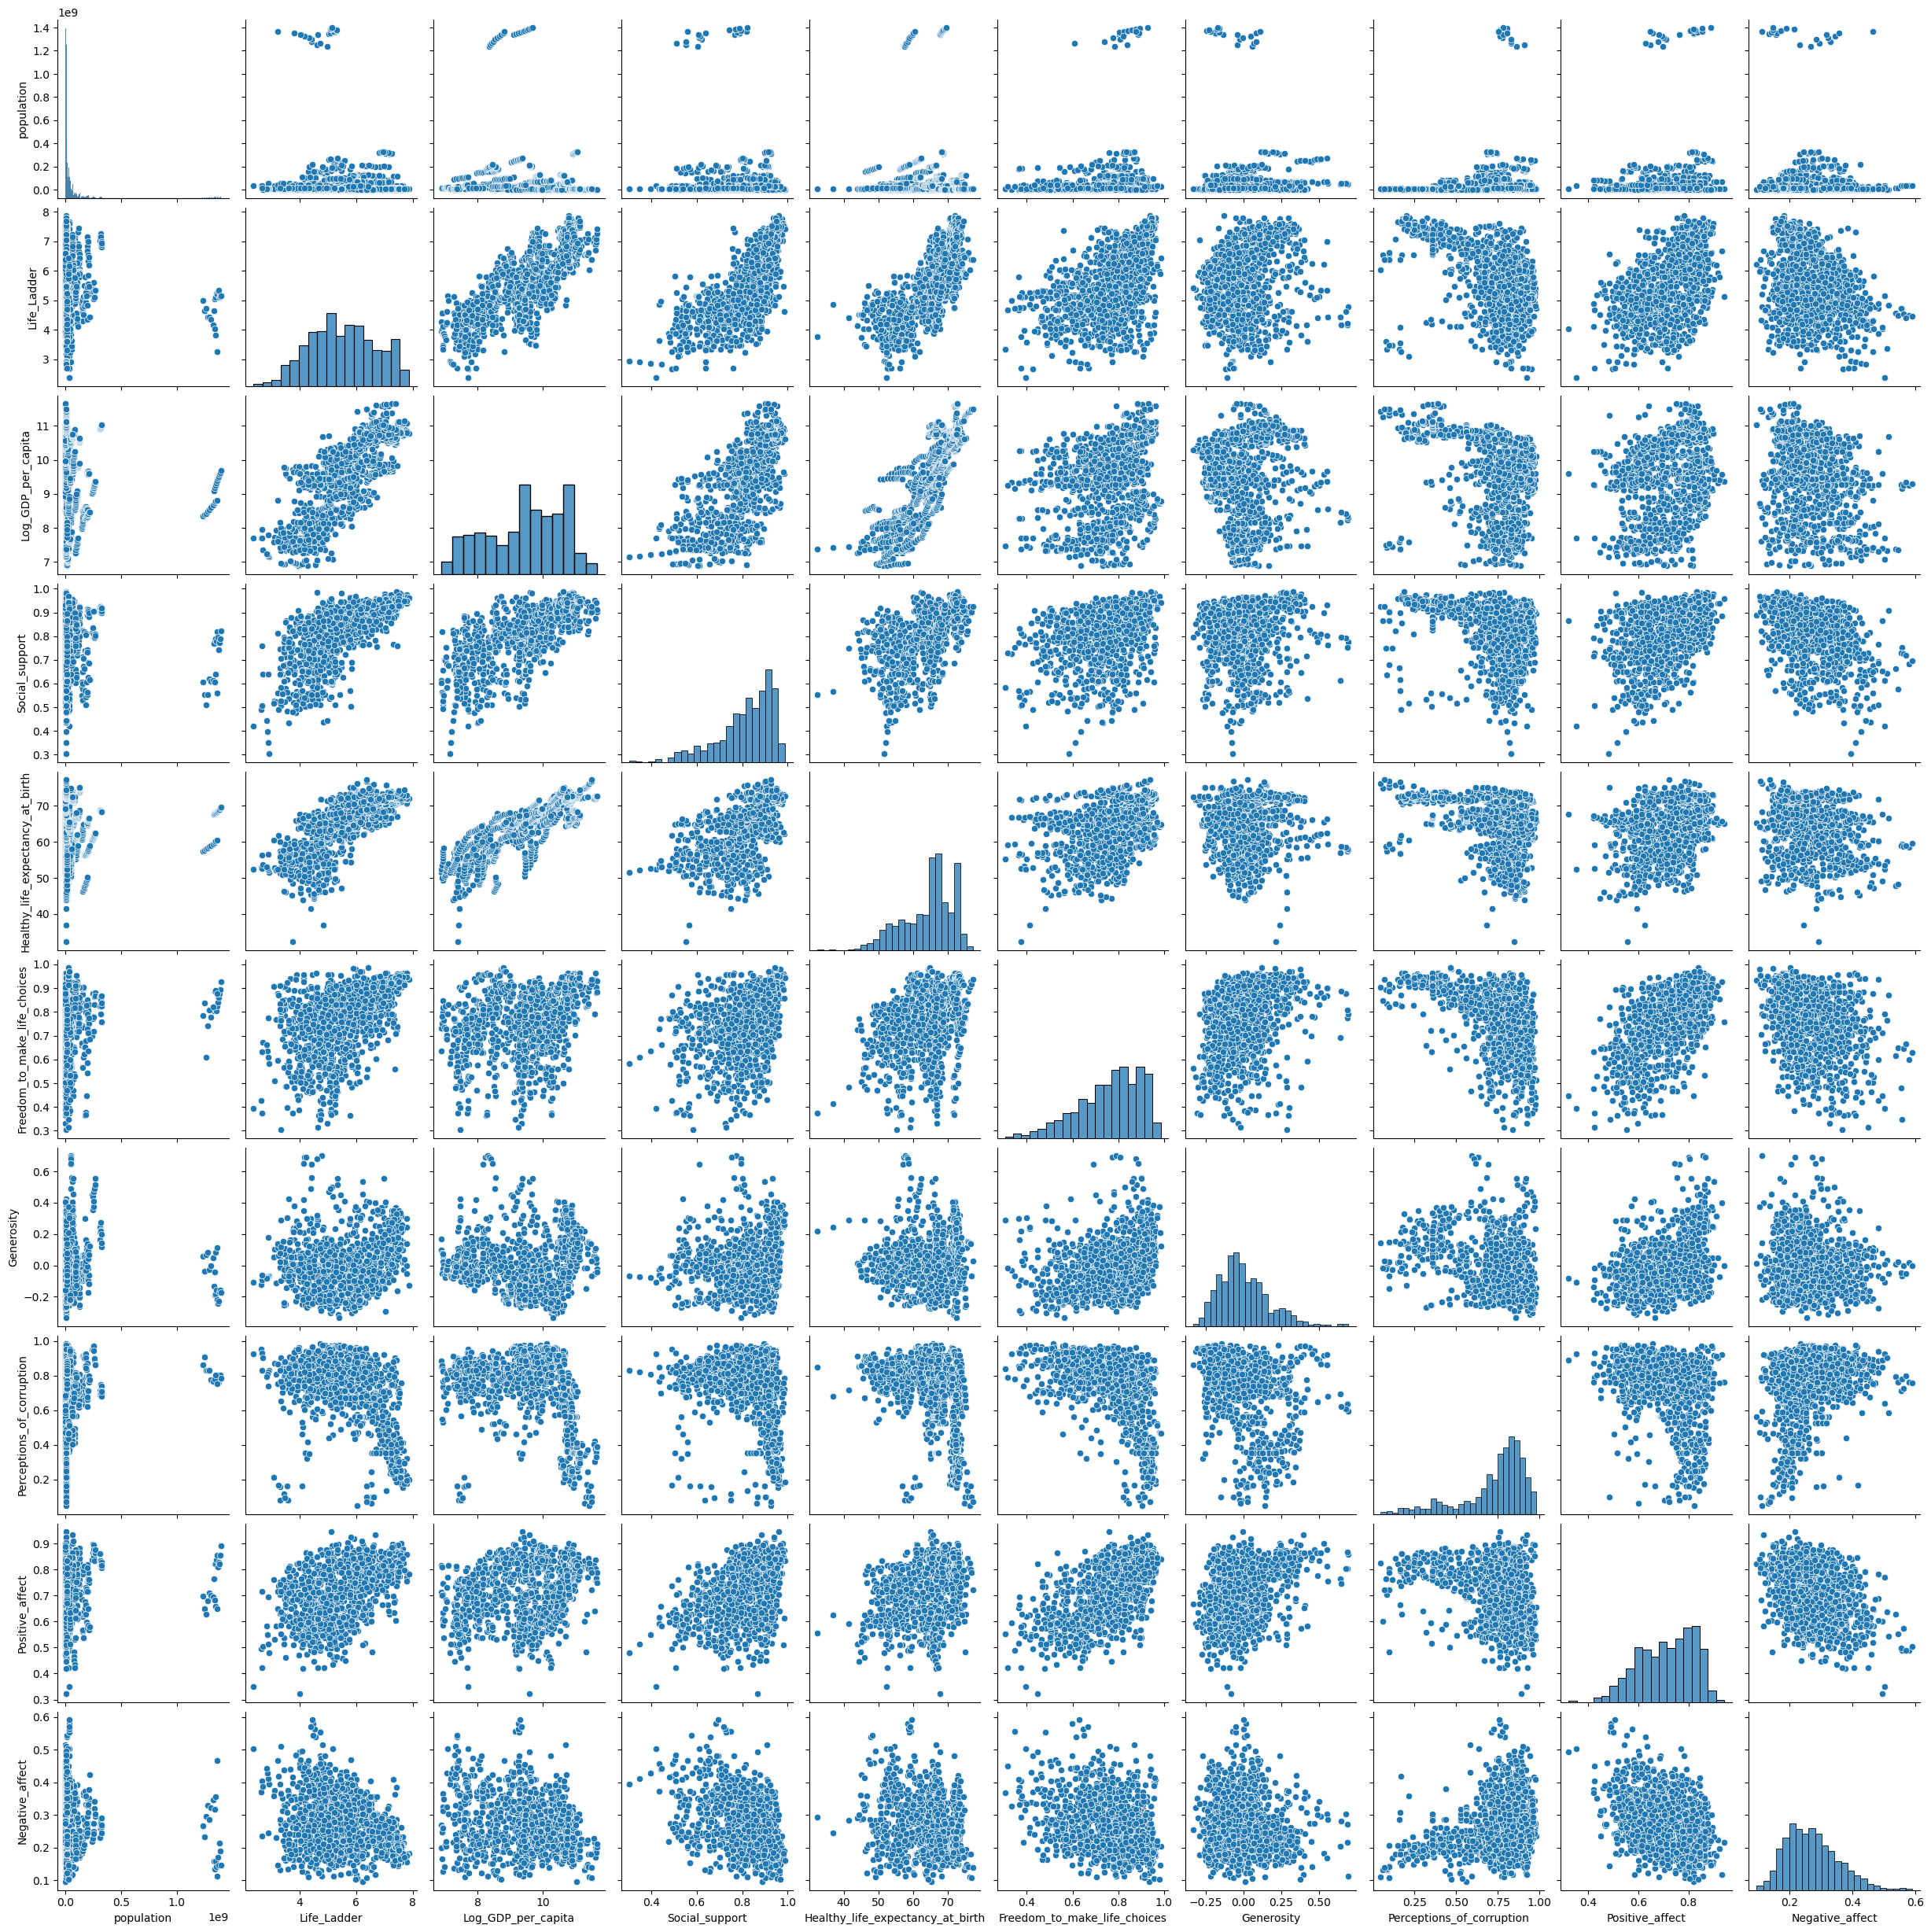

In [10]:
sns.pairplot(report_df.loc[:,'population':])

b. 

If we look at the "Log_GDP_per_capita", then "Life_Ladder", "Social_support", and "Healthy_life_expectancy_at_birth" seem to have some clear trends.For example, as "Log_GDP_per_capita" increases, so does the "Healthy_life_expectancy_at_birth" Do you see others?

c.

In [11]:
# look at page 90 for correlation coefficient
report_df.loc[:,['Log_GDP_per_capita', 'Healthy_life_expectancy_at_birth']].corr()


,Log_GDP_per_capita,Healthy_life_expectancy_at_birth
Log_GDP_per_capita,1.000000,0.857981
Healthy_life_expectancy_at_birth,0.857981,1.000000


# Excercise 4

For this exercise, we will continue using WH Report_preprocessed.csv. Draw the following described visualizations.

    a.	Draw a visual that examine the relationship between the two attributes Continent and Generosity. 
    b.	Based on the visual, is there a relationship between the two attributes? Explain why.

a.

Continent is a categorical attribute.
Generosity is a numerical attribute. We need to convert it to categorical data using the pd.cut method.

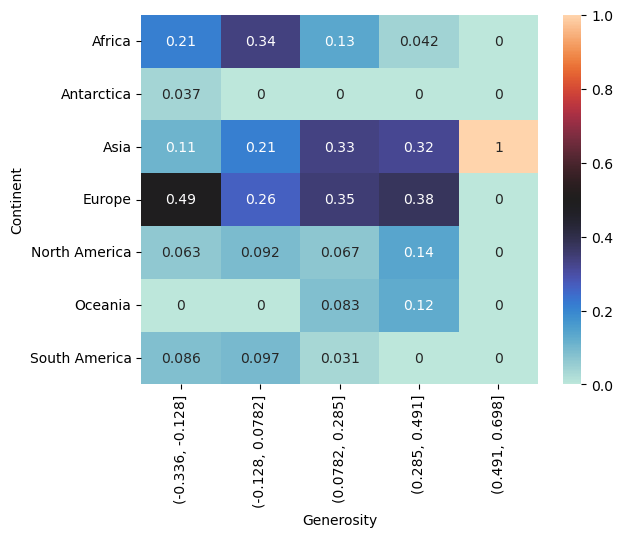

In [12]:
generosity_discretized = pd.cut(report_df.Generosity, bins=5)
contingency_tbl = pd.crosstab(report_df.Continent, generosity_discretized)
probability_tbl = contingency_tbl / contingency_tbl.sum()
sns.heatmap(probability_tbl, annot=True, center=0.5)
plt.show()

b.

There does seem to be a relationship between Continent and Generosity. Europe is more associated with low Generosity, whereas the Asian continent has a stronger association with the high Generosity measures.

# Excercise 5

For this exercise, we will be using whickham.csv. Draw the following described visualizations.

    a.	What is the numerical attribute in this dataset? Draw two different plots that summarize the population of data objects for the numerical attribute.
    b.	What are the categorical attributes in this dataset? Draw a plot per attribute that summarizes the population of the data object for each attribute. 
    c.	 Draw a visual that examine the relationship between outcome and smoker. Do you notice anything surprising about this visualization?
    d.	To demystify the surprising relationship you observed on c) run the following code, and study the visual it creates.

```
person_df = pd.read_csv('whickham.csv')
person_df['age_discretized'] = pd.cut(person_df.age, bins = 4, labels=False)
person_df.groupby(['age_discretized','smoker']).outcome.value_counts().unstack().unstack().plot.bar(stacked=True)
plt.show()
```

    e.	Using the visual that was created under d) explain the surprising observation under c).
    f.	How many dimensions the visual that was created under d) has? How did we manage to add dimensions to the bar chart?


In [13]:
person_df = pd.read_csv('whickham.csv')
person_df.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


a.

Text(0.5, 0, 'Age')

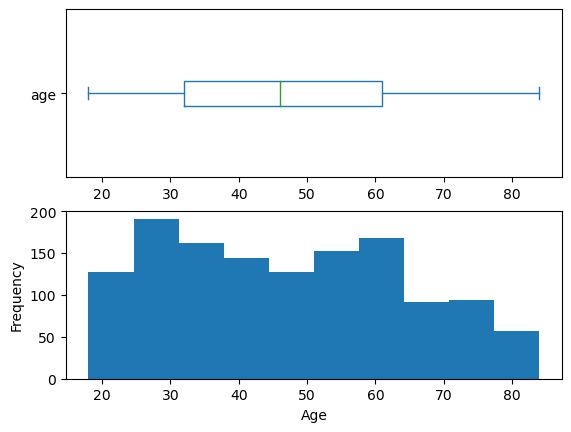

In [14]:
# age is the numerical attribute
plt.subplot(2, 1, 1)
person_df['age'].plot.box(vert=False)

plt.subplot(2, 1, 2)
person_df['age'].plot.hist()
plt.xlabel("Age")

b.

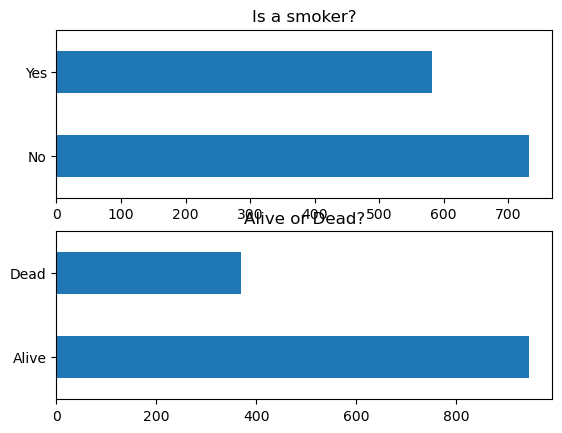

In [15]:
# Outcome and Smoker are the categorical attributes
plt.subplot(2, 1, 1)
person_df['smoker'].value_counts().plot.barh()
plt.title('Is a smoker?')
plt.subplot(2, 1, 2)
person_df['outcome'].value_counts().plot.barh()
plt.title('Alive or Dead?')
plt.show()

c. 

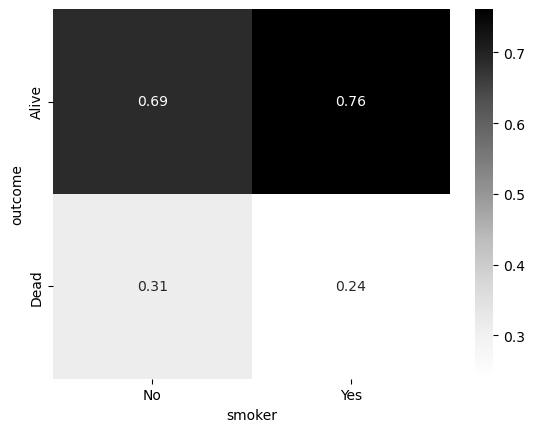

In [16]:
contingency_tbl = pd.crosstab(person_df.outcome,person_df.smoker)
probablity_tbl = contingency_tbl/ contingency_tbl.sum()
sns.heatmap(probablity_tbl, annot=True, center=0.5 ,cmap="Greys")
plt.show()

d. 

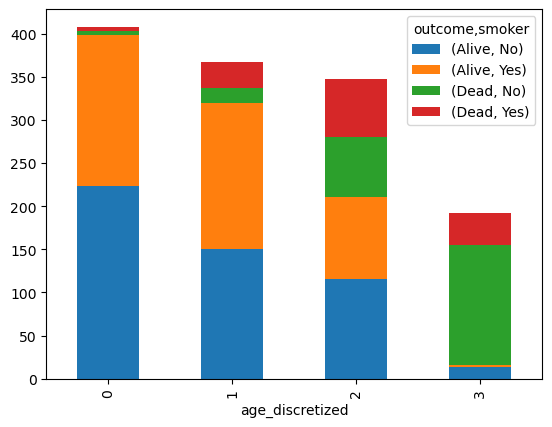

In [17]:
person_df = pd.read_csv('whickham.csv')
person_df['age_discretized'] = pd.cut(person_df.age, bins = 4, labels=False)
person_df.groupby(['age_discretized','smoker']).outcome.value_counts().unstack().unstack().plot.bar(stacked=True)
plt.show()

e.

Young people are less likely to die than old people, even if they are smokers. However, smokers don't seem to hang around as long.

f.

I count 4 dimensions. Count, age, outcome, and smoker. Did I miss any?

# Excercise 6

For this exercise, we will be using WH Report_preprocessed.csv. 

    a.	Use this dataset to create a 5-dimensional scatterplot to show the interactions between the following 5 attributes: year, Healthy_life_expectancy_at_birth, Social_support, Life_Ladder, population. Use the control bar for the “year”, marker size for population, marker color for Social_support, x-axis for Healthy_life_expectancy_at_birth, and y-axis for Life_Ladder.
    b.	Interact with and study the visual you created under a) and report your observations. 



In [18]:
report_df = pd.read_csv('WH Report_preprocessed.csv')
report_df.head()

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,Asia,2010,29185507.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
1,Afghanistan,Asia,2011,30117413.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
2,Afghanistan,Asia,2012,31161376.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
3,Afghanistan,Asia,2013,32269589.0,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
4,Afghanistan,Asia,2014,33370794.0,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375


a.

The first problem is figuring out how to deal with the attributs:
- Healthy_life_expectency_at_birth and Life_Ladder are numerical values and go on the X and Y based on the instructions. 
- year is used for the interaction so that we can see trends as time progresses  
- population is numerical and used to control the size of the marker
- Social_support is used to determine color, but is numerical and color is best used for categorical data, so we will need to make some bins using pd.cut




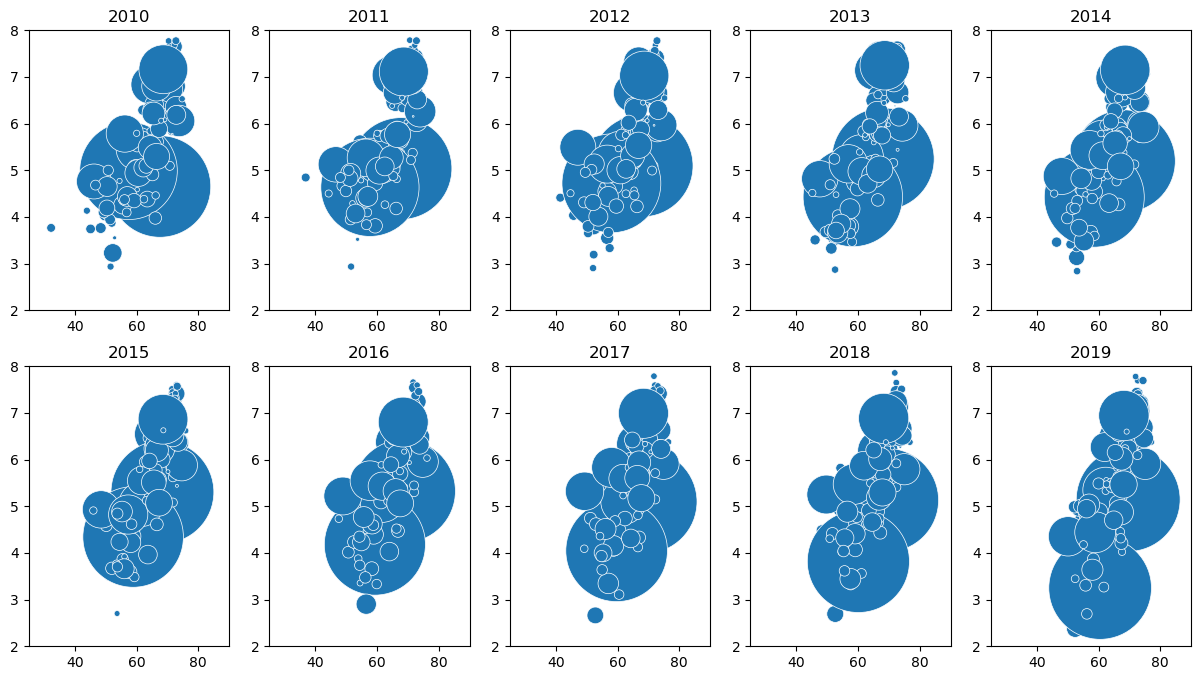

In [19]:
# This is almost a direct copy and paste from the chapter 5 code. 
# This gives us a static plot with that is one dimension short.
# We still have to deal with the Social_support attribute and how we are going 
# use if for colors. Let's thing about that before we deal with making it interactive.
plt.figure(figsize=(15,8)) 

years = report_df['year'].unique()

for i, year in enumerate(years):
    BM = report_df['year'] == year
    X= report_df.loc[BM, 'Healthy_life_expectancy_at_birth']
    Y= report_df.loc[BM, 'Life_Ladder']
    size = report_df.loc[BM, 'population'] / 250000 # adjust the scale factor by experimenting until it looks right

    plt.subplot(2,5,i+1)
    plt.scatter(X,Y, s=size, linewidths=0.5, edgecolors='w')
    plt.title(year)
    # don't forget to adjust the limits for the data!
    plt.xlim([25,90])
    plt.ylim([2,8])

plt.show()

In [20]:
# so colors seem to be the challeng because we have to make categories for a numerical value.
# We learned the solution to that when we worked with `pd.cut`.
# Let's use pd.cut to make a new column that has bins for the Social_support attribute.
# I chose to use 1-5 stars to show how much social support there was. Descriptive words would be 
# better, but without knowing too much about the data I opted on the side of caution.
report_df['soc_support_stars'] = pd.cut(report_df['Social_support'], bins=5, labels=['*', '**', '***', '****', '*****'])
report_df.head()

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect,soc_support_stars
0,Afghanistan,Asia,2010,29185507.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,**
1,Afghanistan,Asia,2011,30117413.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,**
2,Afghanistan,Asia,2012,31161376.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,**
3,Afghanistan,Asia,2013,32269589.0,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273,**
4,Afghanistan,Asia,2014,33370794.0,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375,**


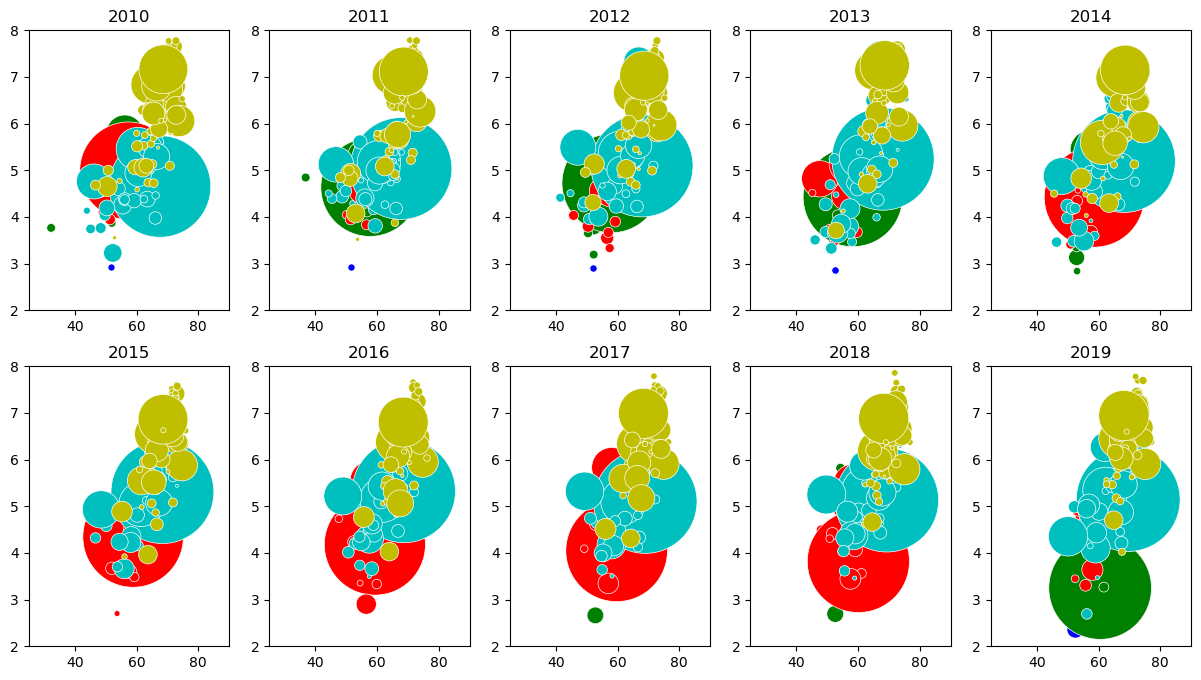

In [21]:
# now lets add some color
colors_dict = {'*' : 'b', '**' : 'g', '***' : 'r', '****' : 'c', '*****' : 'y'}
plt.figure(figsize=(15,8)) 

years = report_df['year'].unique()

for i, year in enumerate(years):
    BM1 = report_df['year'] == year
    for support_cat in colors_dict.keys():
        BM2 = report_df['soc_support_stars'] == support_cat
        BM = BM1 & BM2
        X= report_df.loc[BM, 'Healthy_life_expectancy_at_birth']
        Y= report_df.loc[BM, 'Life_Ladder']
        size = report_df.loc[BM, 'population'] / 250000 # adjust the scale factor by experimenting until it looks right

        plt.subplot(2,5,i+1)
        plt.scatter(X,Y, s=size, marker='o', linewidths=0.5, edgecolors='w', c=colors_dict[support_cat], label=support_cat)
        plt.title(year)
        # don't forget to adjust the limits for the data!
        plt.xlim([25,90])
        plt.ylim([2,8])

plt.show()

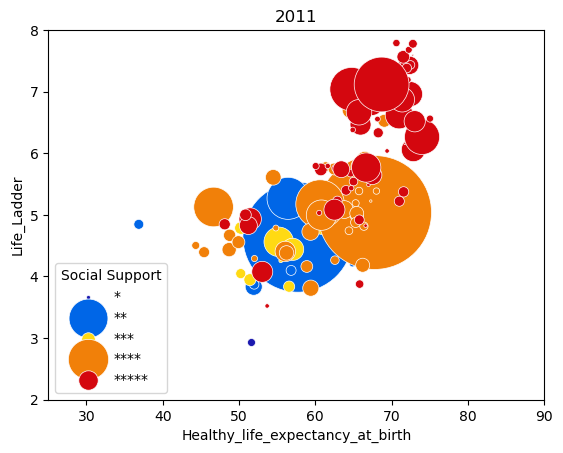

In [22]:
# Now we modify what we had above to be more generalized and but it in a function.
def plotyear(year):
    colors_dict = {'*' : '#1c1aaf', '**' : '#0066e7', '***' : '#ffda13', '****' : '#f18009', '*****' : '#d4070f'}

    for support_cat in colors_dict.keys():
        BM1 = report_df['year'] == year
        BM2 = report_df['soc_support_stars'] == support_cat
        BM = BM1 & BM2
        X= report_df.loc[BM, 'Healthy_life_expectancy_at_birth']
        Y= report_df.loc[BM, 'Life_Ladder']
        size = report_df.loc[BM, 'population'] / 200000 # adjust the scale factor by experimenting until it looks right

        plt.scatter(X,Y, s=size, marker='o', linewidths=0.5, edgecolors='w', c=colors_dict[support_cat], label=support_cat)
    plt.title(year)
    # don't forget to adjust the limits for the data!
    plt.xlim([25,90])
    plt.ylim([2,8])
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Life_Ladder')
    plt.legend(loc='lower left', markerscale=.5, ncol=1, title='Social Support')
    plt.show()

plotyear(2011)

In [23]:
# Now we make it interactive:
min_year = report_df.year.min()
max_year = report_df.year.max()

from ipywidgets import interact, widgets

interact(plotyear,year=widgets.IntSlider(min=min_year,max=max_year,step=1,value=min_year))

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

b. 

Countries where there is more social support not only tend to have longer living populations, but also tend to score higher in the Life_Ladder attribute. The life_ladder is the response to the Gallup World Poll "Cantril Ladder" where respondants are asked to rate their life from 0 to 10 where 10 is the best possible life and 0 is the worst.


# Excercise 7

For this exercise, we will continue using WH Report_preprocessed.csv. 

    a.	Create a visual that shows the trend of change for the attribute Generosity for all the countries in the dataset. To avoid making the visual overwhelming use the color grey for the line plots of all the countries, and don’t use a legend.
    b.	Add three more line plots to the previous visual using the color blue and a thicker line (linewidth=1.8) for the three countries, United States, China, and India. Work out the visual so it only shows you the legend of these three countries. The following screenshot shows the visual that is being described.



Figure 5. 23. Line plot comparing Generosity across all countries in 2010 and 2019 with emphasis on the United States, India, and China


    c.	Report your observations from the visual. Make sure to employ all of the line plots (grey and blue ones) in your observations 

a.

In [24]:
report_df.loc[report_df['Name'] == 'United States']

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect,soc_support_stars
1160,United States,Oceania,2010,309321666.0,7.164,10.905,0.926,68.70,0.828,0.244,0.690,0.861,0.231,*****
1161,United States,Oceania,2011,311556874.0,7.115,10.913,0.922,68.68,0.863,0.161,0.697,0.836,0.273,*****
1162,United States,Oceania,2012,313830990.0,7.026,10.928,0.903,68.66,0.823,0.215,0.710,0.834,0.260,*****
1163,United States,Oceania,2013,315993715.0,7.249,10.939,0.925,68.64,0.792,0.274,0.747,0.814,0.260,*****
1164,United States,Oceania,2014,318301008.0,7.151,10.956,0.902,68.62,0.866,0.221,0.702,0.834,0.281,*****
1165,United States,Oceania,2015,320635163.0,6.864,10.977,0.904,68.60,0.849,0.219,0.698,0.814,0.275,*****
1166,United States,Oceania,2016,322941311.0,6.804,10.986,0.897,68.50,0.758,0.144,0.739,0.806,0.264,*****
1167,United States,Oceania,2017,324985539.0,6.992,11.001,0.921,68.40,0.868,0.197,0.681,0.827,0.268,*****
1168,United States,Oceania,2018,326687501.0,6.883,11.025,0.904,68.30,0.825,0.116,0.710,0.815,0.292,*****
1169,United States,Oceania,2019,328239523.0,6.944,11.043,0.917,68.20,0.836,0.144,0.707,0.815,0.244,*****


In [25]:
countries = report_df['Name'].unique()
# The author does a group by in his example, but we don't need to do that.
# Instead, we can just slice the data set and then set the index to replicate the
# dataframe created by the groupby (it is the last example in Chapter 5)
country_gen_df = report_df.loc[:,['Name','year','Generosity']].set_index(['Name','year'])['Generosity']
country_gen_df.head()

Name         year
Afghanistan  2010    0.121
             2011    0.162
             2012    0.236
             2013    0.061
             2014    0.104
Name: Generosity, dtype: float64

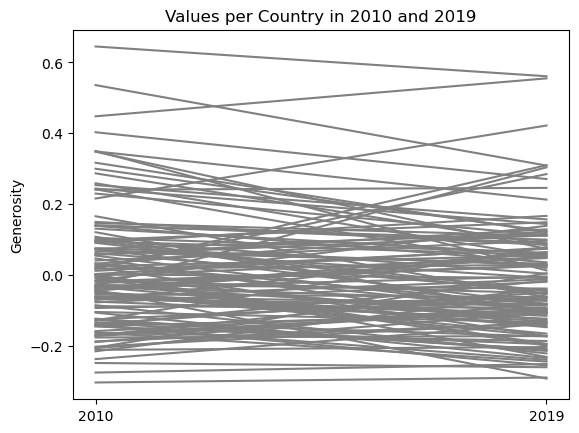

In [26]:
# Now we that we have the data in the correct shape, we can alter the example code to make it work.
for country in countries:
    plt.plot([2010,2019],country_gen_df.loc[country, [2010,2019]], label=country, c='gray')
plt.xticks([2010,2019])
plt.title('Values per Country in 2010 and 2019')
plt.ylabel('Generosity')
plt.show()

b.

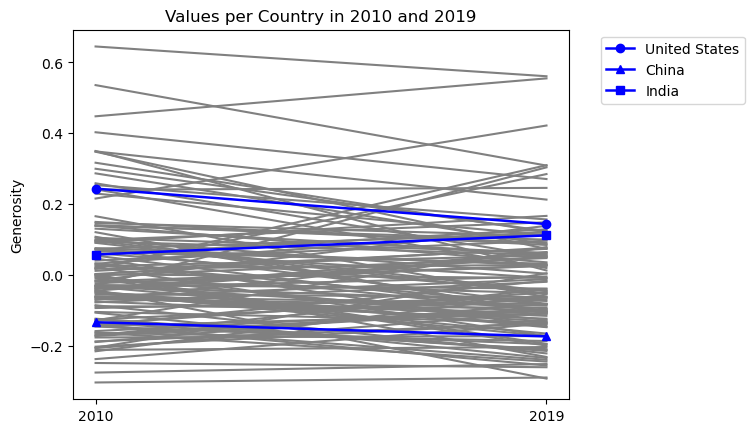

In [27]:
# We want to highlight these three countries.
highlighted_countries = ['United States', 'China', 'India']
# Since we are only working with blue and grey, we will need to indicate which line belongs to which country
# and markers are an effective way to do this.
markers = ['o', '^', 's']
# We need a list of the countries to loop over
countries = report_df['Name'].unique()
# This is replicating the shape of the result of the groupby in the the author's example
country_gen_df = report_df.loc[:,['Name','year','Generosity']].set_index(['Name','year'])['Generosity']

# Originally, I did not have two separate loops. Instead, I started with a single loop that
# contained an if/else statement to see if the country was in the highlighted_countries list.
# What about the result would make this a better solution?
for country in countries:
    if country not in highlighted_countries:
        # For countries that we do not want to show up in the legend, we do not set the label attribute.
        plt.plot([2010,2019],country_gen_df.loc[country, [2010,2019]], c='gray')
for i, country in enumerate(highlighted_countries):
    # Notice that this has the label attribute set
    plt.plot([2010,2019],country_gen_df.loc[country, [2010,2019]], 
                label=country, c='blue', marker=markers[i], linewidth=1.8)

plt.xticks([2010,2019])
# This puts the legend in the chart.
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Values per Country in 2010 and 2019')
plt.ylabel('Generosity')
plt.show()

c.

The three highlighted countries are the three largest populations in the world. The three countries are not outliers in terms of there scores. The United States ranks higher than India and China scores very low for generosity. Both The United States and China seem to have scores that are trending downwards and becoming less generous. India seems to becoming more generous over time.